# Sampling Methods
## 1. Simple Random Sampling
## 2. Cluster Sampling


## Task 1:Simple Random Sampling (SRS)

### Select a sample of size 100 using SRS.
### Compare the mean and variance of a numerical variable between the sample and the population.

## Datasets:  Load a dataset from an online source (Bank Marketing Dataset from UCI repository)
### https://archive.ics.uci.edu/dataset/222/bank+marketing

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv(r"C:\Users\User\Downloads\bank.csv",sep=';')
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:


numerical_df_population = data.select_dtypes(include='number')
mean_value_population=numerical_df_population.mean()
variance_value_population=numerical_df_population.var()


In [ ]:
print("Population Mean \n",mean_value_population,'\n')
print("Population Variance \n",variance_value_population)

Population Mean 
 age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64 

Population Variance 
 age         1.118562e+02
balance     9.057922e+06
day         6.802402e+01
duration    6.752547e+04
campaign    9.670897e+00
pdays       1.002424e+04
previous    2.868153e+00
dtype: float64


In [ ]:
sample_df=data.sample(n=100,random_state=1)
numerical_df_sample = sample_df.select_dtypes(include='number')
mean_value_sample=numerical_df_sample.mean()
variance_value_sample=numerical_df_sample.var()

In [ ]:
print("Sample Mean \n",mean_value_sample,'\n')
print("Sample Variance \n",variance_value_sample)

Sample Mean 
 age           41.20
balance     1282.72
day           15.33
duration     267.94
campaign       2.61
pdays         56.63
previous       0.79
dtype: float64 

Sample Variance 
 age         9.505051e+01
balance     2.860546e+06
day         6.486980e+01
duration    6.646519e+04
campaign    5.856465e+00
pdays       1.303856e+04
previous    3.076667e+00
dtype: float64


## Task 2: Cluster Sampling

## Divide the data into clusters based on a categorical variable.
## Randomly select 3 clusters and take all the data points from those clusters.
## Compare the summary statistics (mean, median, etc.) between the sample and the population.

Clustering based on job

In [ ]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')

In [ ]:
clusters=data.groupby('job')

In [ ]:
import numpy as np
np.random.seed(42)
cluster_keys = list(clusters.groups.keys())
selected_clusters = np.random.choice(cluster_keys, size=3, replace=False)
print(selected_clusters)

['unemployed' 'technician' 'admin.']


In [ ]:
cluster_sample = pd.concat([clusters.get_group(cluster) for cluster in selected_clusters])
cluster_sample_numerical=cluster_sample.select_dtypes('number')

In [ ]:
print("Mean of Population")
print(numerical_df_population.mean())
print('\n')
print("Median of Population")
print(numerical_df_population.median())
print('\n')
print("Mode of Population")
print(numerical_df_population.mode())
print('\n')
print("Variance of Population")
print(numerical_df_population.var())

Mean of Population
age           41.170095
balance     1422.657819
day           15.915284
duration     263.961292
campaign       2.793630
pdays         39.766645
previous       0.542579
dtype: float64


Median of Population
age          39.0
balance     444.0
day          16.0
duration    185.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64


Mode of Population
   age  balance  day  duration  campaign  pdays  previous
0   34        0   20       123         1     -1         0


Variance of Population
age         1.118562e+02
balance     9.057922e+06
day         6.802402e+01
duration    6.752547e+04
campaign    9.670897e+00
pdays       1.002424e+04
previous    2.868153e+00
dtype: float64


In [ ]:
print("Mean of Cluster Sample")
print(cluster_sample_numerical.mean())
print('\n')
print("Median of Cluster Sample")
print(cluster_sample_numerical.median())
print('\n')
print("Mode of Cluster Sample")
print(cluster_sample_numerical.mode())
print('\n')
print("Variance of Cluster Sample")
print(cluster_sample_numerical.var())

Mean of Cluster Sample
age           39.677584
balance     1272.220524
day           16.224163
duration     250.660116
campaign       2.692140
pdays         42.751820
previous       0.591703
dtype: float64


Median of Cluster Sample
age          38.0
balance     435.0
day          16.0
duration    176.0
campaign      2.0
pdays        -1.0
previous      0.0
dtype: float64


Mode of Cluster Sample
   age  balance  day  duration  campaign  pdays  previous
0   34        0   20        77         1     -1         0


Variance of Cluster Sample
age         8.196808e+01
balance     6.086987e+06
day         7.093733e+01
duration    6.507302e+04
campaign    7.924818e+00
pdays       1.038957e+04
previous    2.844826e+00
dtype: float64


## Summarize the results for each sampling method


## Result for Task 1

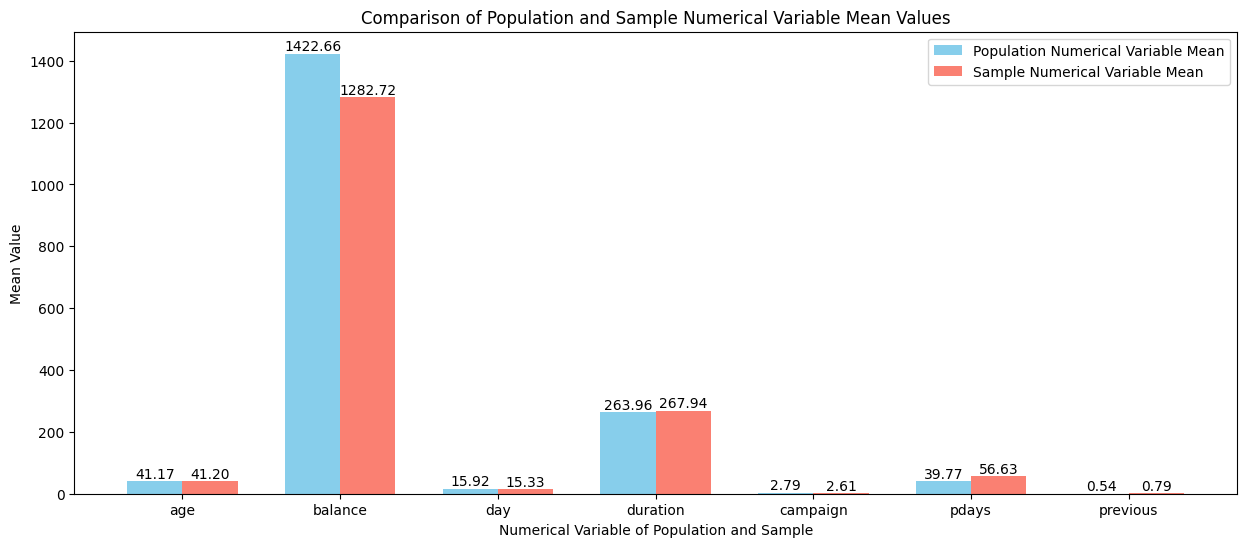

In [ ]:

bar_width = 0.35

r1 = np.arange(len(mean_value_population))
r2 = r1 + bar_width

fig, ax = plt.subplots(figsize=(15, 6))

bars1 = ax.bar(r1, mean_value_population, color='skyblue', width=bar_width, label='Population Numerical Variable Mean')
bars2 = ax.bar(r2, mean_value_sample, color='salmon', width=bar_width, label='Sample Numerical Variable Mean')


ax.set_xlabel('Numerical Variable of Population and Sample')
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Population and Sample Numerical Variable Mean Values')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(mean_value_population.index)
ax.legend()


for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')


plt.show()


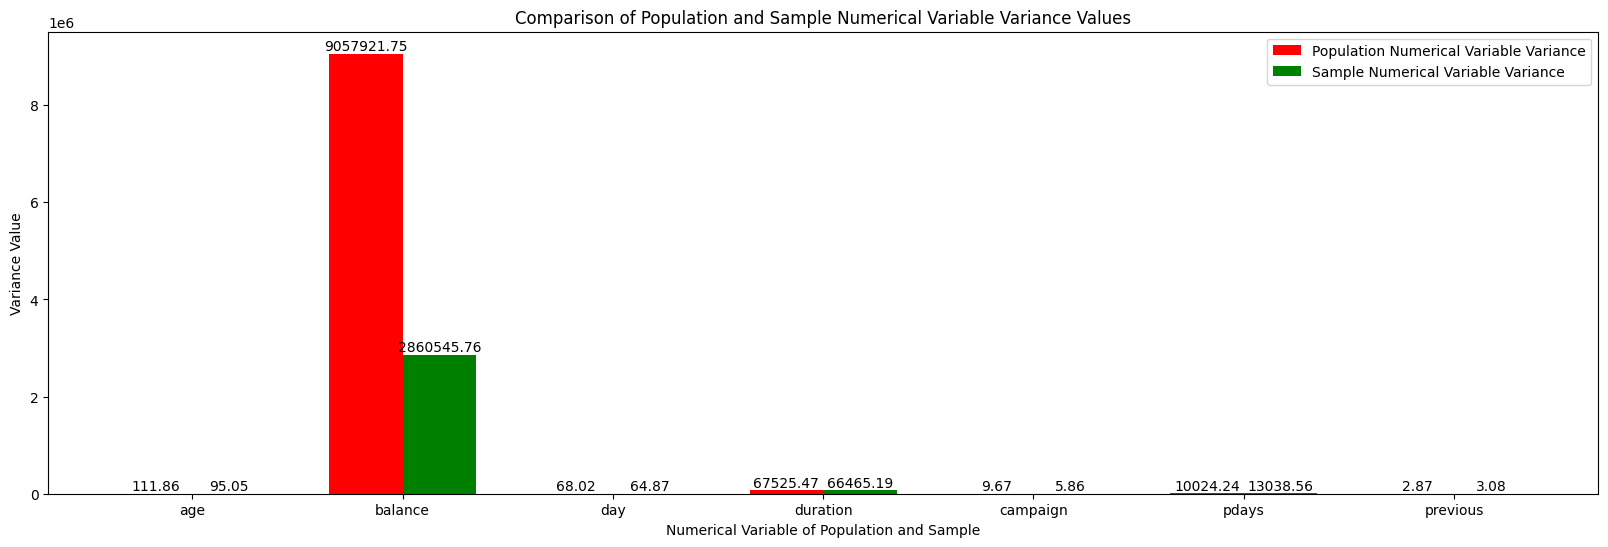

In [ ]:
bar_width = 0.35

r1 = np.arange(len(variance_value_population))
r2 = r1 + bar_width

fig, ax = plt.subplots(figsize=(20, 6))

bars1 = ax.bar(r1, variance_value_population, color='red', width=bar_width, label='Population Numerical Variable Variance')
bars2 = ax.bar(r2, variance_value_sample, color='green', width=bar_width, label='Sample Numerical Variable Variance')


ax.set_xlabel('Numerical Variable of Population and Sample')
ax.set_ylabel('Variance Value')
ax.set_title('Comparison of Population and Sample Numerical Variable Variance Values')
ax.set_xticks(r1 + bar_width / 2)
ax.set_xticklabels(mean_value_population.index)
ax.legend()


for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')


plt.show()


## Result for Task 2

In [ ]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
cluster_sample.describe()

,age,balance,day,duration,campaign,pdays,previous
count,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000,1374.000000
mean,39.677584,1272.220524,16.224163,250.660116,2.692140,42.751820,0.591703
std,9.053622,2467.182003,8.422430,255.094148,2.815105,101.929243,1.686661
min,22.000000,-1680.000000,1.000000,5.000000,1.000000,-1.000000,0.000000
25%,32.000000,61.250000,9.000000,100.000000,1.000000,-1.000000,0.000000
50%,38.000000,435.000000,16.000000,176.000000,2.000000,-1.000000,0.000000
75%,46.000000,1411.500000,22.000000,298.750000,3.000000,-1.000000,0.000000
max,71.000000,27733.000000,31.000000,3025.000000,32.000000,871.000000,20.000000
